In [55]:
import pandas as pd
data=pd.read_csv("data.csv")

In [56]:
data.isnull().sum()
data.isna().sum()



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [57]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
xdata=data.iloc[:,2:32].values
xdata
ydata=data.iloc[:,1].values
ydata

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [59]:
#문자 -> 숫자 : 레이블 인코딩, 원핫 인코딩

#문자열 데이터 : 카테고리형(학점,도시...) , 텍스트형(일반적인 문장에 포함된 단어들..)
#A->1, B->2, ...CDF (레이블 인코딩, 숫자가 커질수록 학점이 나쁨)
#A<B<C<D<F

#서울->1, 대전->2, 부산->3, 제주->4, 강릉->5... (레이블 인코딩을 하면 안됨->원핫인코딩)
# 1+2=>3 서울+대전=부산?? 
# 1<2<3<...???

#A->1000, B->0100, O->0010, AB->0001 (원핫인코딩)
#서울->10000, ... 강릉->00001 (원핫인코딩)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#주의!!! 레이블 인코딩은 선형회귀와 같은 알고리즘에 적용하면 안됨!!!

In [60]:
items=['tv', '냉장고', '에어컨', '에어컨', '전자레인지', 'tv']
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print(labels)

[0 1 2 2 3 0]


In [61]:
encoder.inverse_transform(labels) #원 데이터

array(['tv', '냉장고', '에어컨', '에어컨', '전자레인지', 'tv'], dtype='<U5')

In [62]:
encoder.classes_ #종류

array(['tv', '냉장고', '에어컨', '전자레인지'], dtype='<U5')

In [63]:
import numpy as np 
ydata=np.where(ydata == 'M',1,0)

In [64]:
labels

array([0, 1, 2, 2, 3, 0], dtype=int32)

In [65]:
#원핫인코딩: 1) 원핫인코딩을 하기 전에 모든 문자열 값을 숫자로 변환
#2) 숫자로 변환된 데이터(2차원)에 대해 원핫인코딩

In [66]:
#원핫인코딩
items=['tv', '냉장고', '에어컨', '에어컨', '전자레인지', 'tv']
#1) 원핫인코딩을 하기 전에 모든 문자열 값을 숫자로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print(labels)

#숫자로 변환된 데이터(2차원)에 대해 원핫인코딩
labels=labels.reshape(-1,1)
ohe=OneHotEncoder()
ohe.fit(labels)
oh_labels=ohe.transform(labels)
print(oh_labels.toarray())


df=pd.DataFrame(['tv', '냉장고', '에어컨', '에어컨', '전자레인지', 'tv'], 
                columns=['items'])
pd.get_dummies(df)

[0 1 2 2 3 0]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


,items_tv,items_냉장고,items_에어컨,items_전자레인지
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
5,1,0,0,0


In [67]:
#변수의 스케일링(표준화, 정규화)을 하지 않아도 됨
#연속형, 바이너리형.. 데이터들이 혼합되어 있어도 잘 동작

#유클리디안거리
#x축:몸무게, y축:태어난 날로부터 경과일(30살=약11000)
#(y2-y1)2 + (x2-x1)2   1/2
#47    10099

In [68]:
#train -> dt -> 모델 -> train입력 -> 모델평가(성능100%) => 가지치기를 안함.
#train입력-> 모델평가(95%) >> test입력->모델평가(73%) => 오버피팅(일반화를(가지치기) 하지 않아서...)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest =  train_test_split(xdata,ydata,test_size = 0.25,random_state= 0)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfModel = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state= 0 )
rfModel.fit(xtrain,ytrain)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [75]:
ypred = rfModel.predict(xtest)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [77]:
cm = confusion_matrix(ytest,ypred)
cm

array([[89,  1],
       [ 1, 52]], dtype=int64)

In [78]:
'''
암을 검진할 때 암에 걸린 것을 양성(P) 걸리지 않은것을 음성(N)
종양 (tumar) 양성 (benign) 악성 (malignat)

       암예측       암x예측
실제암  [[89(TP)),  1(FN)],
실제x암 [ 1(FP), 52(TN)]], dtype=int64)
       
TP: 암을 암이라고 예측
TN : 암이 아닌것을 암이라고 정확하게 예측
FP : 암을 암이 아니라고 잘못 예측
FN : 암이 아닌 것을 암이라고 잘못 예측

'''


'\n      암예측 암x예측\n실제암  [[89,  1],\n실제x암 [ 1, 52]], dtype=int64)\n       \n'

In [81]:
accuracy_score(ytest,ypred)

0.986013986013986

# house-price-advanced ...  집값 예측 모델 만들기

In [ ]:
## sample_ ... 정답 // 모델은 regression
## https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [87]:
train=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [88]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# nan이 많다 . == > 빼도 된다. 

In [92]:
# nan 갯수
train.isnull().sum()[train.isnull().sum() != 0] 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [93]:
train = train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1)
test = test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1)

In [94]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [95]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


<AxesSubplot:>

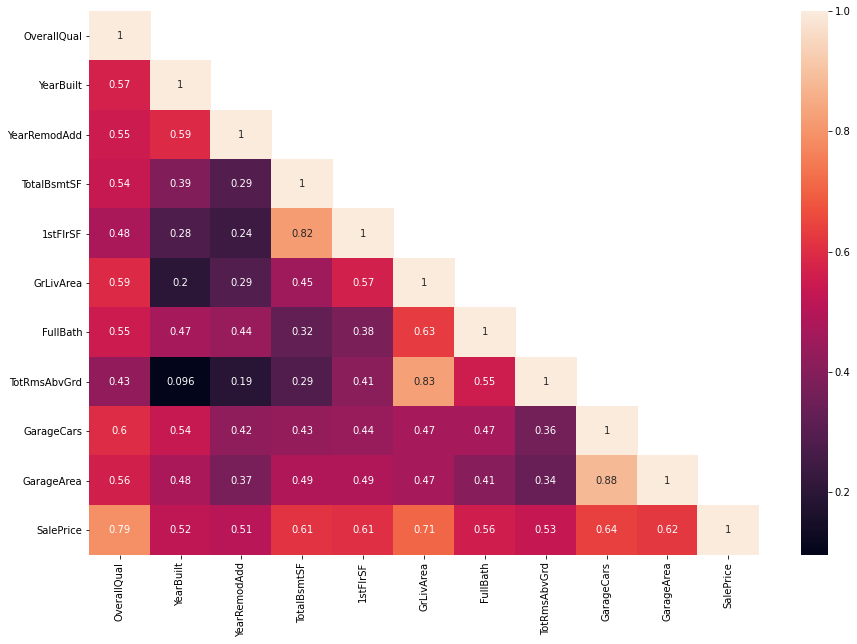

In [128]:
# 랜덤 포레스트 열이 너무 많다. 상관계수를 구해보고 값 비교
import matplotlib.pyplot as plt 
import seaborn as sns 

corr = train.corr()
rev = corr.SalePrice[(corr.SalePrice).abs() > 0.5]
corr2 = list(rev.index.values)
tt = train[corr2].corr()
mask = np.array(tt)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (15,10))
sns.heatmap(tt,annot= True,mask=mask)

In [127]:
# YearBuilt TotalBsmtSF 1stFlrSF GrLivArea GarageArea
# 카테고리화 
# 먼저 상관계수가 높은 것을 가지고 돌려보자 

In [168]:
list_all = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
x_train_all = train[list_all]
y_train_all = train['SalePrice']
test_all = test[list_all]

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
xtrain,xtest,ytrain,ytest =  train_test_split(x_train_all,y_train_all,test_size = 0.25,random_state= 0)

In [171]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [175]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators=10,random_state= 0)
rfmodel.fit(xtrain,ytrain)
ypred = rfmodel.predict(xtest)


In [176]:
# sample = pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")
# ytest= np.array(sample.iloc[:,1])

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
#print(confusion_matrix(ytest,ypred))
#print(accuracy_score(ytest,ypred))

TypeError: score() missing 1 required positional argument: 'y'